In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import os
%matplotlib inline

In [12]:
main_dir = "data\คำสั่งซื้อที่สำเร็จ SHOPEE"
df_list = []
for year_folder in os.listdir(main_dir):

    folder_path = os.path.join(main_dir , year_folder)

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path , file)

        df = pd.read_excel(file_path)
        df_list.append(df)

df = pd.concat(df_list , axis = 0)

df.head(4)

,หมายเลขคำสั่งซื้อ,สถานะการสั่งซื้อ,สถานะการคืนเงินหรือคืนสินค้า,ชื่อผู้ใช้ (ผู้ซื้อ),วันที่ทำการสั่งซื้อ,เวลาการชำระสินค้า,ช่องทางการชำระเงิน,ช่องทางการชำระเงิน (รายละเอียด),แผนการผ่อนชำระ,ค่าธรรมเนียม (%),...,หมายเลขโทรศัพท์,หมายเหตุจากผู้ซื้อ,ที่อยู่ในการจัดส่ง,ประเทศ,จังหวัด,เขต/อำเภอ,รหัสไปรษณีย์,ประเภทคำสั่งซื้อ,เวลาที่ทำการสั่งซื้อสำเร็จ,บันทึก
0,2301029VMHUC12,สำเร็จแล้ว,NaN,cariperr.timm,2023-01-02 13:26,2023-01-02 13:27,ShopeePay - ตัดบัญชีธนาคาร,NaN,Airpay GIRO,3.21%,...,******60,NaN,******นซื่อตรงบางใหญ่ อำเภอบางบัวทอง จังหวัดนน...,TH,จังหวัดนนทบุรี,อำเภอบางบัวทอง,11110,NaN,2023-01-04 14:46,NaN
1,230103C1XG2VXQ,สำเร็จแล้ว,NaN,suchanat_niraharnee,2023-01-03 10:06,2023-01-03 10:07,ShopeePay,NaN,Airpay Wallet V2,3.21%,...,******30,NaN,******มณ์ อำเภอบางบาล จังหวัดพระนครศรีอยุธยา 1...,TH,จังหวัดพระนครศรีอยุธยา,อำเภอบางบาล,13250,NaN,2023-01-04 17:45,NaN
2,230103C1XG2VXQ,สำเร็จแล้ว,NaN,suchanat_niraharnee,2023-01-03 10:06,2023-01-03 10:07,ShopeePay,NaN,Airpay Wallet V2,3.21%,...,******30,NaN,******มณ์ อำเภอบางบาล จังหวัดพระนครศรีอยุธยา 1...,TH,จังหวัดพระนครศรีอยุธยา,อำเภอบางบาล,13250,NaN,2023-01-04 17:45,NaN
3,230103C1XG2VXQ,สำเร็จแล้ว,NaN,suchanat_niraharnee,2023-01-03 10:06,2023-01-03 10:07,ShopeePay,NaN,Airpay Wallet V2,3.21%,...,******30,NaN,******มณ์ อำเภอบางบาล จังหวัดพระนครศรีอยุธยา 1...,TH,จังหวัดพระนครศรีอยุธยา,อำเภอบางบาล,13250,NaN,2023-01-04 17:45,NaN


In [13]:
df.columns

Index(['หมายเลขคำสั่งซื้อ', 'สถานะการสั่งซื้อ', 'สถานะการคืนเงินหรือคืนสินค้า',
       'ชื่อผู้ใช้ (ผู้ซื้อ)', 'วันที่ทำการสั่งซื้อ', 'เวลาการชำระสินค้า',
       'ช่องทางการชำระเงิน', 'ช่องทางการชำระเงิน (รายละเอียด)',
       'แผนการผ่อนชำระ', 'ค่าธรรมเนียม (%)', 'ตัวเลือกการจัดส่ง',
       'วิธีการจัดส่ง', '*หมายเลขติดตามพัสดุ',
       'วันที่คาดว่าจะทำการจัดส่งสินค้า', 'เวลาส่งสินค้า',
       'เลขอ้างอิง Parent SKU', 'ชื่อสินค้า',
       'เลขอ้างอิง SKU (SKU Reference No.)', 'ชื่อตัวเลือก', 'ราคาตั้งต้น',
       'ราคาขาย', 'จำนวน', 'Returned quantity', 'ราคาขายสุทธิ',
       'ส่วนลดจาก Shopee', 'โค้ดส่วนลดชำระโดยผู้ขาย', 'โค้ด Coins Cashback',
       'โค้ดส่วนลดชำระโดย Shopee', 'โค้ดส่วนลด',
       'เข้าร่วมแคมเปญ bundle deal หรือไม่',
       'ส่วนลด bundle deal ชำระโดยผู้ขาย', 'ส่วนลด bundle deal ชำระโดย Shopee',
       'ส่วนลดจากการใช้เหรียญ', 'ส่วนลดทั้งหมดจากบัตรเครดิต', 'ค่าคอมมิชชั่น',
       'Transaction Fee', 'ต้นทุนขายหักคูปองและcoin',
       'ค่าจัดส่งที่ชำระโดยผู้ซื้อ', 'ค

**Feature Engineering**

In [14]:
df.drop(columns = ["ค่าธรรมเนียม (%)" , "วิธีการจัดส่ง" , "เลขอ้างอิง Parent SKU" , "สถานะการสั่งซื้อ" , "สถานะการคืนเงินหรือคืนสินค้า"] , inplace = True)

In [21]:
#Time Preprocess
df["วันที่ทำการสั่งซื้อ"] = pd.to_datetime(df["วันที่ทำการสั่งซื้อ"])
df["เวลาการชำระสินค้า"] = pd.to_datetime(df["เวลาการชำระสินค้า"])

In [24]:
# Example for Hour of the Day
df['Hour'] = df['วันที่ทำการสั่งซื้อ'].dt.hour
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

# Example for Day of the Week
df['Day of Week'] = df["วันที่ทำการสั่งซื้อ"].dt.dayofweek
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['Day of Week'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['Day of Week'] / 7)

In [25]:
# Example for Time of Day Binning
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time of Day'] = df['Hour'].apply(categorize_time_of_day)

# Convert the Time of Day feature to one-hot encoding
df = pd.get_dummies(df, columns=['Time of Day'], drop_first=True)


In [26]:
df

,หมายเลขคำสั่งซื้อ,ชื่อผู้ใช้ (ผู้ซื้อ),วันที่ทำการสั่งซื้อ,เวลาการชำระสินค้า,ช่องทางการชำระเงิน,ช่องทางการชำระเงิน (รายละเอียด),แผนการผ่อนชำระ,ตัวเลือกการจัดส่ง,*หมายเลขติดตามพัสดุ,วันที่คาดว่าจะทำการจัดส่งสินค้า,...,บันทึก,Hour,Hour_sin,Hour_cos,Day of Week,DayOfWeek_sin,DayOfWeek_cos,Time of Day_Evening,Time of Day_Morning,Time of Day_Night
0,2301029VMHUC12,cariperr.timm,2023-01-02 13:26:00,2023-01-02 13:27:00,ShopeePay - ตัดบัญชีธนาคาร,NaN,Airpay GIRO,Standard Delivery - ส่งธรรมดาในประเทศ-SPX Express,SPXTH038051184011,2023-01-05 13:27,...,NaN,13,-0.258819,-0.965926,0,0.000000,1.00000,False,False,False
1,230103C1XG2VXQ,suchanat_niraharnee,2023-01-03 10:06:00,2023-01-03 10:07:00,ShopeePay,NaN,Airpay Wallet V2,Standard Delivery - ส่งธรรมดาในประเทศ-Kerry,SHP5317703539,2023-01-05 10:07,...,NaN,10,0.500000,-0.866025,1,0.781831,0.62349,False,True,False
2,230103C1XG2VXQ,suchanat_niraharnee,2023-01-03 10:06:00,2023-01-03 10:07:00,ShopeePay,NaN,Airpay Wallet V2,Standard Delivery - ส่งธรรมดาในประเทศ-Kerry,SHP5317703539,2023-01-05 10:07,...,NaN,10,0.500000,-0.866025,1,0.781831,0.62349,False,True,False
3,230103C1XG2VXQ,suchanat_niraharnee,2023-01-03 10:06:00,2023-01-03 10:07:00,ShopeePay,NaN,Airpay Wallet V2,Standard Delivery - ส่งธรรมดาในประเทศ-Kerry,SHP5317703539,2023-01-05 10:07,...,NaN,10,0.500000,-0.866025,1,0.781831,0.62349,False,True,False
4,230103C5QPPABJ,kitdykat,2023-01-03 11:14:00,2023-01-03 11:45:00,เก็บเงินปลายทาง,NaN,Cash on Delivery,Standard Delivery - ส่งธรรมดาในประเทศ-Kerry,SHP5317717110,2023-01-05 11:45,...,NaN,11,0.258819,-0.965926,1,0.781831,0.62349,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,240806JM2E9T82,benjawanrittimontri,2024-08-06 17:40:00,2024-08-06 17:40:00,SPayLater,Shopee Credit Down Payment,Shopee Credit BNPL,Standard Delivery - ส่งธรรมดาในประเทศ-SPX Express,TH241403052864O,2024-08-07 23:59,...,NaN,17,-0.965926,-0.258819,1,0.781831,0.62349,True,False,False
261,240806JM2E9T82,benjawanrittimontri,2024-08-06 17:40:00,2024-08-06 17:40:00,SPayLater,Shopee Credit Down Payment,Shopee Credit BNPL,Standard Delivery - ส่งธรรมดาในประเทศ-SPX Express,TH241403052864O,2024-08-07 23:59,...,NaN,17,-0.965926,-0.258819,1,0.781831,0.62349,True,False,False
262,240806JA0YYUCX,sodsairodyou,2024-08-06 14:40:00,2024-08-06 14:40:00,ShopeePay,NaN,Airpay Wallet V2,Standard Delivery - ส่งธรรมดาในประเทศ-SPX Express,TH245589204925I,2024-08-07 23:59,...,NaN,14,-0.500000,-0.866025,1,0.781831,0.62349,False,False,False
263,240806JA0YYUCX,sodsairodyou,2024-08-06 14:40:00,2024-08-06 14:40:00,ShopeePay,NaN,Airpay Wallet V2,Standard Delivery - ส่งธรรมดาในประเทศ-SPX Express,TH245589204925I,2024-08-07 23:59,...,NaN,14,-0.500000,-0.866025,1,0.781831,0.62349,False,False,False


In [22]:
df

,หมายเลขคำสั่งซื้อ,ชื่อผู้ใช้ (ผู้ซื้อ),วันที่ทำการสั่งซื้อ,เวลาการชำระสินค้า,ช่องทางการชำระเงิน,ช่องทางการชำระเงิน (รายละเอียด),แผนการผ่อนชำระ,ตัวเลือกการจัดส่ง,*หมายเลขติดตามพัสดุ,วันที่คาดว่าจะทำการจัดส่งสินค้า,...,หมายเลขโทรศัพท์,หมายเหตุจากผู้ซื้อ,ที่อยู่ในการจัดส่ง,ประเทศ,จังหวัด,เขต/อำเภอ,รหัสไปรษณีย์,ประเภทคำสั่งซื้อ,เวลาที่ทำการสั่งซื้อสำเร็จ,บันทึก
0,2301029VMHUC12,cariperr.timm,2023-01-02 13:26:00,2023-01-02 13:27:00,ShopeePay - ตัดบัญชีธนาคาร,NaN,Airpay GIRO,Standard Delivery - ส่งธรรมดาในประเทศ-SPX Express,SPXTH038051184011,2023-01-05 13:27,...,******60,NaN,******นซื่อตรงบางใหญ่ อำเภอบางบัวทอง จังหวัดนน...,TH,จังหวัดนนทบุรี,อำเภอบางบัวทอง,11110,NaN,2023-01-04 14:46,NaN
1,230103C1XG2VXQ,suchanat_niraharnee,2023-01-03 10:06:00,2023-01-03 10:07:00,ShopeePay,NaN,Airpay Wallet V2,Standard Delivery - ส่งธรรมดาในประเทศ-Kerry,SHP5317703539,2023-01-05 10:07,...,******30,NaN,******มณ์ อำเภอบางบาล จังหวัดพระนครศรีอยุธยา 1...,TH,จังหวัดพระนครศรีอยุธยา,อำเภอบางบาล,13250,NaN,2023-01-04 17:45,NaN
2,230103C1XG2VXQ,suchanat_niraharnee,2023-01-03 10:06:00,2023-01-03 10:07:00,ShopeePay,NaN,Airpay Wallet V2,Standard Delivery - ส่งธรรมดาในประเทศ-Kerry,SHP5317703539,2023-01-05 10:07,...,******30,NaN,******มณ์ อำเภอบางบาล จังหวัดพระนครศรีอยุธยา 1...,TH,จังหวัดพระนครศรีอยุธยา,อำเภอบางบาล,13250,NaN,2023-01-04 17:45,NaN
3,230103C1XG2VXQ,suchanat_niraharnee,2023-01-03 10:06:00,2023-01-03 10:07:00,ShopeePay,NaN,Airpay Wallet V2,Standard Delivery - ส่งธรรมดาในประเทศ-Kerry,SHP5317703539,2023-01-05 10:07,...,******30,NaN,******มณ์ อำเภอบางบาล จังหวัดพระนครศรีอยุธยา 1...,TH,จังหวัดพระนครศรีอยุธยา,อำเภอบางบาล,13250,NaN,2023-01-04 17:45,NaN
4,230103C5QPPABJ,kitdykat,2023-01-03 11:14:00,2023-01-03 11:45:00,เก็บเงินปลายทาง,NaN,Cash on Delivery,Standard Delivery - ส่งธรรมดาในประเทศ-Kerry,SHP5317717110,2023-01-05 11:45,...,******26,NaN,******อ.วังโป่ง จ.เพชรบูรณ์ 67240 อำเภอวังโป่ง...,TH,จังหวัดเพชรบูรณ์,อำเภอวังโป่ง,67240,NaN,2023-01-04 17:52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,240806JM2E9T82,benjawanrittimontri,2024-08-06 17:40:00,2024-08-06 17:40:00,SPayLater,Shopee Credit Down Payment,Shopee Credit BNPL,Standard Delivery - ส่งธรรมดาในประเทศ-SPX Express,TH241403052864O,2024-08-07 23:59,...,******49,NaN,****** ตำบลดินดำ อำเภอจังหาร จังหวัดร้อยเอ็ด 4...,TH,จังหวัดร้อยเอ็ด,อำเภอจังหาร,45000,NaN,2024-08-09 13:09,NaN
261,240806JM2E9T82,benjawanrittimontri,2024-08-06 17:40:00,2024-08-06 17:40:00,SPayLater,Shopee Credit Down Payment,Shopee Credit BNPL,Standard Delivery - ส่งธรรมดาในประเทศ-SPX Express,TH241403052864O,2024-08-07 23:59,...,******49,NaN,****** ตำบลดินดำ อำเภอจังหาร จังหวัดร้อยเอ็ด 4...,TH,จังหวัดร้อยเอ็ด,อำเภอจังหาร,45000,NaN,2024-08-09 13:09,NaN
262,240806JA0YYUCX,sodsairodyou,2024-08-06 14:40:00,2024-08-06 14:40:00,ShopeePay,NaN,Airpay Wallet V2,Standard Delivery - ส่งธรรมดาในประเทศ-SPX Express,TH245589204925I,2024-08-07 23:59,...,******59,NaN,"****** ราชพฤกษ์, แขวง บางจาก​ เขต​ภาษีเจริญ​ ...",TH,จังหวัดกรุงเทพมหานคร,เขตภาษีเจริญ,10160,NaN,2024-08-09 13:38,NaN
263,240806JA0YYUCX,sodsairodyou,2024-08-06 14:40:00,2024-08-06 14:40:00,ShopeePay,NaN,Airpay Wallet V2,Standard Delivery - ส่งธรรมดาในประเทศ-SPX Express,TH245589204925I,2024-08-07 23:59,...,******59,NaN,"****** ราชพฤกษ์, แขวง บางจาก​ เขต​ภาษีเจริญ​ ...",TH,จังหวัดกรุงเทพมหานคร,เขตภาษีเจริญ,10160,NaN,2024-08-09 13:38,NaN


In [17]:
# customer_groups = [
#     {
#         "group_name": "Price-Sensitive Customers",
#         "relevant_features": [
#             "ราคาขาย", #(Sale Price)
#             "ส่วนลดจาก Shopee", #(Shopee Discount)
#             "โค้ดส่วนลดชำระโดยผู้ขาย", #(Discount Code by Seller)
#             "โค้ด Coins Cashback"
#         ],
#         "description": "Customers who are likely to respond to discounts, cashback offers, and other price-related promotions."
#     },
#     {
#         "group_name": "Product-Focused Customers",
#         "relevant_features": [
#             "ชื่อสินค้า", #(Product Name)
#             "เลขอ้างอิง SKU (SKU Reference No.)",
#             "เข้าร่วมแคมเปญ bundle deal หรือไม่", #(Participation in Bundle Deal)
#             "แผนการผ่อนชำระ" #(Installment Plan)
#         ],
#         "description": "Customers who are influenced by specific product promotions, bundles, or installment payment options."
#     },
#     {
#         "group_name": "Loyalty-Driven Customers",
#         "relevant_features": [
#             "ชื่อผู้ใช้ (ผู้ซื้อ)", #(Username)
#             "วันที่ทำการสั่งซื้อ", #(Order Date)
#             "เวลาที่ทำการสั่งซื้อสำเร็จ", #(Order Completion Time)
#             "ส่วนลด bundle deal ชำระโดย Shopee" #(Shopee-Paid Bundle Deal Discount)
#         ],
#         "description": "Customers who respond to loyalty rewards and have a history of repeat purchases."
#     },
#     {
#         "group_name": "Convenience-Oriented Customers",
#         "relevant_features": [
#             "ช่องทางการชำระเงิน", #(Payment Method)
#             "วิธีการจัดส่ง", #(Shipping Method)
#             "ค่าจัดส่งที่ชำระโดยผู้ซื้อ", #(Shipping Fee Paid by Buyer)
#             "เวลาส่งสินค้า" #(Delivery Time)
#         ],
#         "description": "Customers who prioritize convenience and are influenced by promotions that offer free or expedited shipping, easy payment options, etc."
#     },
#     {
#         "group_name": "High-Value Customers",
#         "relevant_features": [
#             "จำนวนเงินทั้งหมด", #(Total Amount)
#             #"ค่าธรรมเนียม (%)", #(Fee Percentage)
#             "ค่าคอมมิชชั่น" #(Commission Fee)
#         ],
#         "description": "Customers who typically make higher-value purchases and respond to exclusive promotions or benefits."
#     },
#     {
#         "group_name": "Location-Based Customers",
#         "relevant_features": [
#             "ที่อยู่ในการจัดส่ง", #(Shipping Address)
#             "ประเทศ", #(Country)
#             "จังหวัด", #(Province)
#             "เขต/อำเภอ", #(District)
#             "รหัสไปรษณีย์" #(Postal Code)
#         ],
#         "description": "Customers who respond well to region-specific promotions or offers relevant to their specific area."
#     }
# ]


In [ ]:
[Price-Sensitive Customers , Product-Focused Customers , Loyalty-Driven Customers , Convenience-Oriented Customers , High-Value Customers , Location-Based Customers]

In [18]:
categories = []
for group in customer_groups:
    categories.append(df[group["relevant_features"]])

KeyError: "['วิธีการจัดส่ง'] not in index"

In [ ]:
categories[0].head()

,ราคาขาย,ส่วนลดจาก Shopee,โค้ดส่วนลดชำระโดยผู้ขาย,โค้ด Coins Cashback
0,199.0,0.0,5.0,0.0
1,22.0,0.0,5.0,0.0
2,59.0,0.0,5.0,0.0
3,55.0,0.0,5.0,0.0
4,49.0,0.0,5.0,0.0


In [ ]:
#Making a readable file

# with pd.ExcelWriter('Category.xlsx') as writer:
#     for i in range(len(categories)):
#         categories[i].to_excel(writer , index = False , sheet_name =  customer_groups[i]["group_name"])

**Data Preprocessing**

In [ ]:
scaler = MinMaxScaler()
for feature in categories[0].columns:
    categories[0][[feature]] = scaler.fit_transform(categories[0][[feature]])

C:\Users\thunk\AppData\Local\Temp\ipykernel_4452\506111951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories[0][[feature]] = scaler.fit_transform(categories[0][[feature]])
C:\Users\thunk\AppData\Local\Temp\ipykernel_4452\506111951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories[0][[feature]] = scaler.fit_transform(categories[0][[feature]])
C:\Users\thunk\AppData\Local\Temp\ipykernel_4452\506111951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [ ]:
sse = []
k_range = range(1 , 10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(categories[0])
    sse.append(km.inertia_)

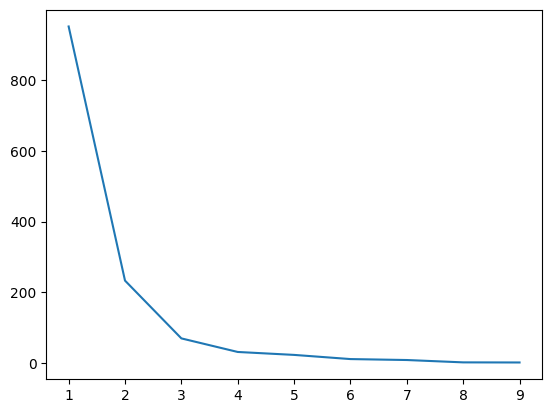

In [ ]:
plt.plot(k_range , sse)

In [ ]:
#4 is the elbow point
km = KMeans(n_clusters= 4)

In [ ]:
km.fit(categories[0])

KMeans(n_clusters=4)

In [ ]:
y_pred = km.predict(categories[0])

In [ ]:
df["cluster"] = y_pred

In [ ]:
cluster_list = []
for i in range(5):
    cluster_list.append(df[df["cluster"] == i])

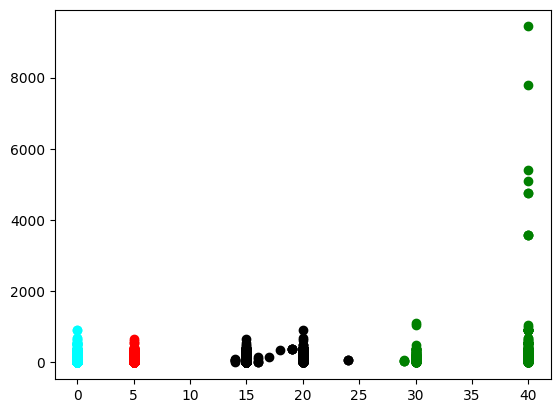

In [ ]:
colors = ["green" , "red" , "black" , "cyan"]

for i in range(4):
    plt.scatter(cluster_list[i][["โค้ดส่วนลดชำระโดยผู้ขาย"]] , cluster_list[i][["ราคาขาย"]] , color = colors[i])

In [ ]:
df.shape

(16605, 55)